## Modeling

We will import the training and test dataset that have already been cleaned and preprocessed in  separate notebooks and will do the modelling and evaluation of the datasets.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#Read the cleaned csv's
#The features are hand picked after feature engineering process in the cleaned datasets.
train_df = pd.read_csv('datasets/train_clean.csv')
test_df = pd.read_csv('datasets/test_clean.csv')

In [3]:
#Set the indexes
train_df.set_index('Id', inplace = True)
test_df.set_index('Id', inplace = True)

In [4]:
#Check the shape of data
print("Train data shape:",train_df.shape)
print("Test data shape:",test_df.shape)

Train data shape: (2043, 198)
Test data shape: (879, 197)


In [5]:
pd.options.display.max_columns = None
display(train_df.head())
display(test_df.head())

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,SalePrice,Garage Age,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0.0,13517,2,2,6,8,289.0,3,2,3,3,1,6,533.0,1,192.0,725.0,4,4,725,754,1479,0.0,2,1,3,1,3,6,7,0,0,2,475.0,3,3,2,0,0,130500,45.0,44,45,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
544,43.0,11492,2,2,7,5,132.0,3,2,4,3,1,

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Garage Age,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Electrical_None,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,69.0,9142,3,2,6,8,0.0,2,1,2,3,1,1,0,1,1020,1020,3,908,1020,1928,0,2,0,4,2,1,9,7,0,0,1,440,1,1,2,0,0,111.0,172,111,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2718,0.0,9662,2,2,5,4,0.0,2,2,4,3,1,1,0,1,1967,1967,2,1967,0,1967,0,2,0,6,2,2,10,7,0,

In [6]:
#creating a list of train_df features
train_list = train_df.columns.to_list()

In [7]:
#creating a list of test_df features
test_list = test_df.columns.to_list()

In [8]:
#Select only the common features
common_features=set(test_list).intersection(set(train_list))
common_features

{'1st Flr SF',
 '2nd Flr SF',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exterior 1st_Wd Sdng',
 'Exterior 1st_WdShing',
 'Exterior 2nd_AsbShng',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_Brk Cmn',
 'Exterior 2nd_BrkFace',
 'Exterior 2

In [9]:
print(train_df.shape)
print(test_df.shape)

(2043, 198)
(879, 197)


In [10]:
#Select predictors
X = train_df[common_features]

In [11]:
#Select target variable
y = train_df['SalePrice']

In [12]:
print(X.shape)
print(y.shape)

(2043, 187)
(2043,)


### Train-test-split training data

In [13]:
# Split the data into training sets and test sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1532, 187)
(1532,)
(511, 187)
(511,)


In [15]:
#Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)


In [16]:
#Using LassoCV to find significant features.
lasso = LassoCV(n_alphas = 50)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=50)

In [17]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 6)
lasso_cv_scores.mean()

0.9088791599301241

In [18]:
lasso_coef = pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'Coefficients')

In [19]:
#Significant features
lasso_coef[lasso_coef['Coefficients'] != 0]

,Coefficients
Gr Liv Area,23590.222268
Overall Qual,11768.273137
Neighborhood_NridgHt,8989.049258
BsmtFin SF 1,8716.329264
Mas Vnr Area,6746.173198
...,...
Bedroom AbvGr,-2241.625258
Bsmt Cond,-2266.115266
Mas Vnr Type_BrkFace,-2413.447689
Roof Style_Mansard,-2424.387973


In [20]:
lasso_coef.head(20)

,Coefficients
Gr Liv Area,23590.222268
Overall Qual,11768.273137
Neighborhood_NridgHt,8989.049258
BsmtFin SF 1,8716.329264
Mas Vnr Area,6746.173198
Lot Area,6499.543943
Total Bsmt SF,6086.400929
Exter Qual,5976.255477
Neighborhood_StoneBr,5786.804566
Overall Cond,5157.179445


In [21]:
lasso_coef.tail(20)

,Coefficients
Condition 1_RRAe,-680.512493
House Style_SLvl,-707.491207
Exterior 1st_Plywood,-740.066741
Bldg Type_Twnhs,-767.233045
Condition 1_Artery,-807.460006
Sale Type_COD,-853.843546
Foundation_CBlock,-903.286937
Neighborhood_Edwards,-912.945316
Neighborhood_NWAmes,-1023.602958
Bsmt Unf SF,-1182.182795


In [22]:
#Insignificant features identified by lasso
lasso_coef[lasso_coef['Coefficients'] == 0].head(20)

,Coefficients
Central Air_Y,-0.0
Land Contour_Low,0.0
MS Zoning_RL,0.0
MS SubClass_20,0.0
MS SubClass_50,0.0
Fireplace Qu,0.0
MS SubClass_85,-0.0
Condition 1_RRNe,0.0
Land Slope,-0.0
Fence,0.0


In [23]:
#Filter varaibles with high and low coefficients
coef_cond = ((lasso_coef['Coefficients'] > 2000) | (lasso_coef['Coefficients'] < (-2000)))

In [24]:
significant_coefs = lasso_coef[coef_cond]
significant_coefs

,Coefficients
Gr Liv Area,23590.222268
Overall Qual,11768.273137
Neighborhood_NridgHt,8989.049258
BsmtFin SF 1,8716.329264
Mas Vnr Area,6746.173198
Lot Area,6499.543943
Total Bsmt SF,6086.400929
Exter Qual,5976.255477
Neighborhood_StoneBr,5786.804566
Overall Cond,5157.179445


In [25]:
significant_features = lasso_coef[coef_cond].index.to_list()
significant_features

['Gr Liv Area',
 'Overall Qual',
 'Neighborhood_NridgHt',
 'BsmtFin SF 1',
 'Mas Vnr Area',
 'Lot Area',
 'Total Bsmt SF',
 'Exter Qual',
 'Neighborhood_StoneBr',
 'Overall Cond',
 'Sale Type_New',
 'Bldg Type_1Fam',
 'Functional',
 'Kitchen Qual',
 'Bsmt Exposure',
 'Neighborhood_NoRidge',
 'Garage Area',
 'Exterior 1st_BrkFace',
 'Land Contour_HLS',
 'Bsmt Qual',
 'TotalPorchArea',
 'Bedroom AbvGr',
 'Bsmt Cond',
 'Mas Vnr Type_BrkFace',
 'Roof Style_Mansard',
 'Property_age']

Let's find the best model with only using the significant features on the training data.

In [26]:
#Use only the significant variables
X_filtered = X[significant_features]

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, random_state = 42)

In [28]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [29]:
#Predict Linear regression values with only significant features
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 3)
lr_cv_scores.mean()

0.9064958809045772

In [31]:
lr_preds = lr.predict(X_val_scaled)
lr.score(X_val_scaled, y_val)

0.9029550912826659

In [32]:
np.sqrt(mean_squared_error(lr_preds, y_val))

25957.09982493001

In [33]:
ridge = RidgeCV(alphas = np.logspace(1, 2, 3000))
ridge.fit(X_train_scaled, y_train)
ridge.alpha_

23.073901819045304

In [34]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 5)
ridge_cv_scores.mean()

0.9061330979734763

In [35]:
ridge_preds = ridge.predict(X_val_scaled)
ridge.score(X_val_scaled, y_val)

0.9025270547346604

In [36]:
np.sqrt(mean_squared_error(ridge_preds, y_val))

26014.281407730705

In [37]:
lasso = LassoCV(n_alphas = 5000)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=5000)

In [38]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.9060848909693217

In [39]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.9027592252892411

In [40]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

25983.281262352215

### Model Evaluation 

Lasso model gives slightly better RMSE score than Ridge. 

In [53]:
residuals = lasso_preds - y_val

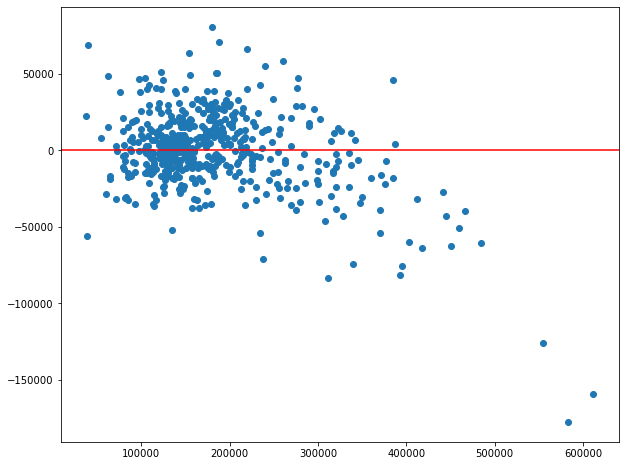

In [54]:
plt.figure(figsize = (10, 8))
plt.scatter(y_val, residuals)
plt.axhline(0, color = 'red')

### Test Predictions

We will apply Lasso model on test data as it seemed to predict best results.

In [43]:
X_test = test_df[significant_features]

In [44]:
X_test_scaled = ss.fit_transform(X_test)
X_test_scaled.shape

(879, 26)

In [45]:
predictions = lasso.predict(X_test_scaled)
predictions

array([137267.94023536, 156395.0144957 , 221234.09802096, 118021.08952046,
       168720.58726862,  90533.17259234, 106572.02760242, 156460.81973898,
       185588.10173604, 165971.92083366, 161700.65050157, 122600.16071327,
       146831.02451591, 235508.97487937, 159086.52515151, 116379.44696053,
       144991.01802468, 120111.44778391, 181396.89311666, 196489.11869986,
       149537.928118  , 128408.64756808, 187945.07697787, 170914.20036845,
       189763.80110028, 125696.21343102, 117681.79587467, 139914.85478473,
       165613.44355333,  45532.03132521, 111521.72236382, 103388.60558623,
       212243.6921123 , 169342.61206998, 206669.25600709, 194816.92717551,
       121891.11303551,  72611.51325362, 126287.03936166, 193343.96877447,
       180948.7032914 , 203289.72734115, 149333.94662864, 168881.22476647,
       221711.81520899,  89873.44407842, 217590.96577987, 122589.55893612,
       121810.63964463, 130608.89677291, 119356.19113441, 215069.92560609,
       237661.26194315, 1

In [46]:
X_test['SalePrice'] = predictions
X_test.head()

,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,BsmtFin SF 1,Mas Vnr Area,Lot Area,Total Bsmt SF,Exter Qual,Neighborhood_StoneBr,Overall Cond,Sale Type_New,Bldg Type_1Fam,Functional,Kitchen Qual,Bsmt Exposure,Neighborhood_NoRidge,Garage Area,Exterior 1st_BrkFace,Land Contour_HLS,Bsmt Qual,TotalPorchArea,Bedroom AbvGr,Bsmt Cond,Mas Vnr Type_BrkFace,Roof Style_Mansard,Property_age,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,0,0,0.0,9142,1020,2,0,8,0,0,7,1,1,0,440,0,0,2,172,4,3,0,0,111,137267.940235
2718,1967,5,0,0,0.0,9662,1967,2,0,4,0,0,7,2,1,0,580,0,0,4,170,6,3,0,0,44,156395.014496
2414,1496,7,0,554,0.0,17104,654,3,0,5,1,1,7,3,3,0,426,0,0,4,124,3,4,0,0,15,221234.098021
1989,968,5,0,0,0.0,8520,968,3,0,6,0,1,7,2,1,0,480,0,0,3,184,2,3,0,0,98,118021.089520
625,1394,6,0,609,247.0,9500,1394,2,0,5,0,1,7,2,1,0,514,0,0,4,261,3,3,1,0,58,168720.587269


In [47]:
submission = X_test[['SalePrice']]
submission.head()

,SalePrice
Id,
2658,137267.940235
2718,156395.014496
2414,221234.098021
1989,118021.089520
625,168720.587269


In [48]:
submission.shape

(879, 1)

In [49]:
# submission.to_csv('datasets/Predicted_prices.csv')

In [50]:
#Plot significant coefs
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

<AxesSubplot:ylabel='0'>

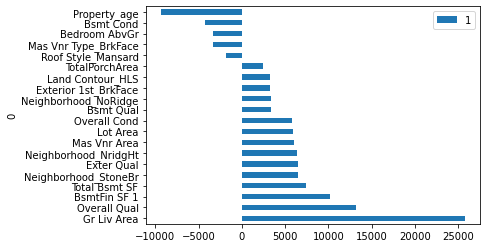

In [51]:
plot_coef(lasso)

In [52]:
significant_coefs

,Coefficients
Gr Liv Area,23590.222268
Overall Qual,11768.273137
Neighborhood_NridgHt,8989.049258
BsmtFin SF 1,8716.329264
Mas Vnr Area,6746.173198
Lot Area,6499.543943
Total Bsmt SF,6086.400929
Exter Qual,5976.255477
Neighborhood_StoneBr,5786.804566
Overall Cond,5157.179445


## Conclusion and Recommendations

#### Top 5 features from final Lasso Regression model

 The top feature that highly influence the price at a coefficient of 23590.22 is property with higher Ground Living area squarefeet. It is no wonder the best predictor as this size of the property greatly influences the Saleprice. At number two, Overall Quality of the property takes the spot and is no suprise that it is one of the top predictors in property prices. Next is the property located in Northridge Heights neighborhood.It is no wonder the best predictor as this neighbourhood is very convenient and is the closest to Iowa State University, the largest university in Iowa state and also very close to downtown. It is very close to elementary, middle and high schools and have amenities really close by.

 Some of the neighborhood that influence high saleprices are
 1. Northridge Heights
 2. Stone Brook
 3. Northridge
 


### Recommendations 

Square feet area, property age, Overall conditions and location are the most important determinant factors of Saleprice.
People looking to sell should do it sooner rather than later as the property age seems the affect the saleprice in a negative way.

To increase the value of a home, one could try to
- Renovate the kitchen
- Remodel the interior and exterior finish
- Add fireplace(if not present already)
- Renovate Garage
- Renovate house if not in good condition
